# Assignmnet-2
by K. Sai Somanath, 18MCMT28

## Question 1

Implement PCA and LDA

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler

In [61]:
def pca(data, components, e=False, std=True):
    if std:
        data_std = StandardScaler().fit_transform(data)
    else:
        data_std = data
    
    U, S, Vt = np.linalg.svd(data_std)
    print(U.shape, S.shape, Vt.shape)
    eigen_vectors = Vt.T
    eigen_values = S ** 2 / (data_std.shape[0] - 1)
    eigen_vectors = eigen_vectors[:, :components]
    eigen_values = eigen_values[:components]
    Y = np.dot(eigen_vectors.T, data_std.T)

    if e is True:
        return Y, eigen_values, eigen_vectors
    else:
        return Y.T

In [36]:
def lda(data, components):
    '''
    data: shape: classes x samples_size x no_features
    '''    
    # np.set_printoptions(precision=4)
    # Find the means
    means = np.mean(data, axis=1)
    # print(means)
    # Find the within class scatter matrix
    scatter_within = np.zeros((data.shape[-1], data.shape[-1]))
    for index, cls in enumerate(data):
        sc_mat = np.zeros((data.shape[-1], data.shape[-1]))
        for row in cls:
            r, m = row.reshape(data.shape[-1], 1), means[index].reshape(data.shape[-1], 1)
            sc_mat += (r-m).dot((r-m).T)
        scatter_within += sc_mat
        
    # print(scatter_within)
    
    # Find the between class matrix
    mu = np.mean(data.reshape(data.shape[0] * data.shape[1], data.shape[2]), axis=0).reshape(data.shape[-1], 1)
    # print(mu)
    scatter_between = np.zeros((data.shape[-1], data.shape[-1]))
    for m in means:
        m = m.reshape(data.shape[-1], 1)
        # print(m, mu, sep='\n\n')
        scatter_between += data.shape[1] * (m - mu).dot((m - mu).T)
    
    # print(scatter_between)
    
    eigen_values, eigen_vectors = np.linalg.eig(np.linalg.inv(scatter_within).dot(scatter_between))
    # print(eigen_values)
    
    # Make a list of (eigenvalue, eigenvector) tuples
    eigen_pairs = [(np.abs(eigen_values[i]), eigen_vectors[:,i]) for i in range(len(eigen_values))]
    # Sort the (eigenvalue, eigenvector) tuples from high to low
    eigen_pairs.sort(key=lambda k: k[0], reverse=True)
    # print(eigen_pairs)
#     matrix_w = np.hstack((eigen_pairs[0][1]))
#     for k in range(1, components):
    temp_t = tuple([eigen_pairs[x][1].reshape(data.shape[-1], 1) for x in range(components)])
    # print(matrix_w)
    matrix_w = np.hstack(temp_t)
    Y = data.reshape(data.shape[0] * data.shape[1], data.shape[2]).dot(matrix_w)
    return Y

## Question 2

Apply PCA and LDA on iris dataset

In [4]:
# Laod data
iris = np.genfromtxt('../iris.csv', delimiter=',', skip_header=1, usecols=(0,1,2,3))

(150, 150) (4,) (4, 4)


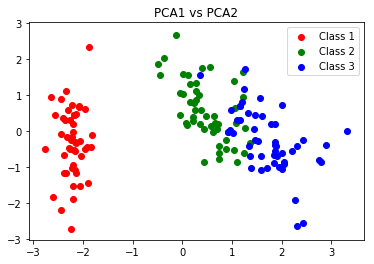

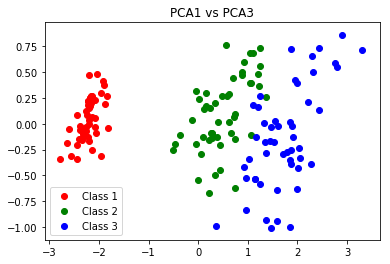

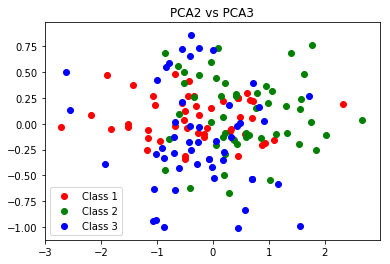

In [60]:
def pcaPlots():
    results = pca(iris, 3)
    plt.scatter(x=results[:50, 0], y=results[:50, 1], c='r', label='Class 1')
    plt.scatter(x=results[50:100, 0], y=results[50:100, 1], c='g', label='Class 2')
    plt.scatter(x=results[100:, 0], y=results[100:, 1], c='b', label='Class 3')
    plt.title('PCA1 vs PCA2')
    plt.legend()
    plt.show()
    plt.scatter(x=results[:50, 0], y=results[:50, 2], c='r', label='Class 1')
    plt.scatter(x=results[50:100, 0], y=results[50:100, 2], c='g', label='Class 2')
    plt.scatter(x=results[100:, 0], y=results[100:, 2], c='b', label='Class 3')
    plt.title('PCA1 vs PCA3')
    plt.legend()
    plt.show()
    plt.scatter(x=results[:50, 1], y=results[:50, 2], c='r', label='Class 1')
    plt.scatter(x=results[50:100, 1], y=results[50:100, 2], c='g', label='Class 2')
    plt.scatter(x=results[100:, 1], y=results[100:, 2], c='b' , label='Class 3')
    plt.title('PCA2 vs PCA3')
    plt.legend()
    plt.show()

pcaPlots()

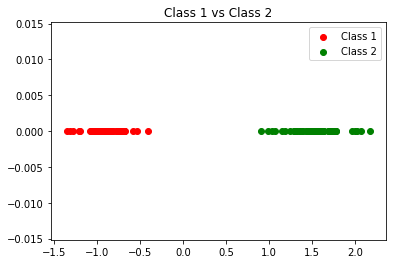

/Users/sai/.virtualenvs/Oculus/lib/python3.6/site-packages/numpy/core/numeric.py:591: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


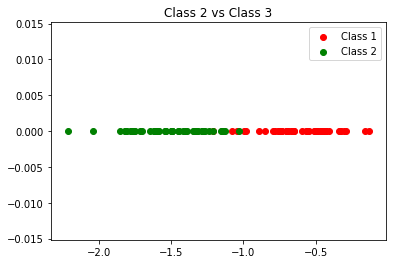

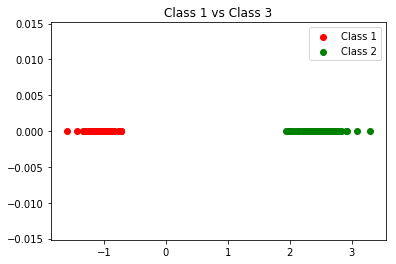

In [6]:
def ldaPlots():
    results = lda(iris[:100, :].reshape(2, 50, 4), 1)
    plt.scatter(x=results[:50], y=[0] * 50, c='r', label='Class 1')
    plt.scatter(x=results[50:], y=[0] * 50, c='g', label='Class 2')
    plt.title('Class 1 vs Class 2')
    plt.legend()
    plt.show()
    results = lda(iris[50:, :].reshape(2, 50, 4), 1)
    plt.scatter(x=results[:50], y=[0] * 50, c='r', label='Class 1')
    plt.scatter(x=results[50:], y=[0] * 50, c='g', label='Class 2')
    plt.title('Class 2 vs Class 3')
    plt.legend()
    plt.show()
    results = lda(np.vstack((iris[:50, :], iris[100:, :])).reshape(2, 50, 4), 1)
    plt.scatter(x=results[:50], y=[0] * 50, c='r', label='Class 1')
    plt.scatter(x=results[50:], y=[0] * 50, c='g', label='Class 2')
    plt.title('Class 1 vs Class 3')
    plt.legend()
    plt.show()
    
ldaPlots()

ToDo sim and difss

## Question 3


In [11]:
# Get data
file_handle = open('Data/arcene_train.data')
train = np.array([list(map(int, file_handle.readline().strip().split(' '))) for _ in range(100)], dtype=np.float64)

file_handle = open('Data/arcene_train.labels')
y_train = np.array([int(file_handle.readline().strip()) for _ in range(100)])

Text(0,0.5,'Eigenvalue')

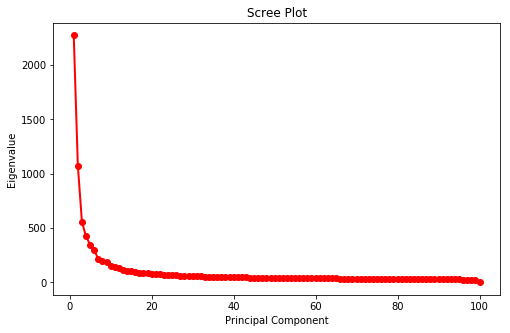

In [12]:
# Get the Scree Plot
Y, eigen_values, eigen_vectors = pca(train, 10000, e=True)
fig = plt.figure(figsize=(8,5))
sing_vals = np.arange(100) + 1
plt.plot(sing_vals, eigen_values, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')

In [19]:
variances = np.cumsum(eigen_values) / eigen_values.sum()
print("The number of components to choose:")
print('0.85:', np.where(variances >= 0.85)[0][0])
print('0.90:', np.where(variances >= 0.90)[0][0])
print('0.95:', np.where(variances >= 0.95)[0][0])
print('0.99:', np.where(variances >= 0.99)[0][0])

The number of components to choose:
0.85: 53
0.90: 66
0.95: 81
0.99: 95


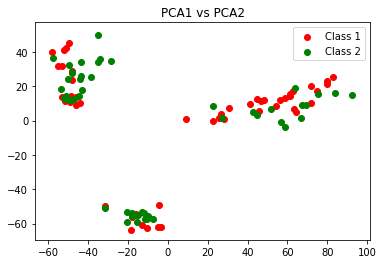

In [31]:
one = train[y_train == -1]
two = train[y_train == 1]
X = np.vstack((one, two))
results = pca(X, 2)

plt.scatter(x=results[:50, 0], y=results[:50, 1], c='r', label='Class 1')
plt.scatter(x=results[50:, 0], y=results[50:, 1], c='g', label='Class 2')
plt.title('PCA1 vs PCA2')
plt.legend()
plt.show()

In [38]:
# results = lda(X.reshape(2, 50, 10000), 1)
# plt.scatter(x=results[:50], y=[0] * 50, c='r', label='Class 1')
# plt.scatter(x=results[50:], y=[0] * 50, c='g', label='Class 2')
# plt.title('Class 1 vs Class 2')
# plt.legend()
# plt.show()

TODO: Add comments

## Question 4

(1500, 3)
Computing LLE embedding
Done. Reconstruction error: 9.24509e-08


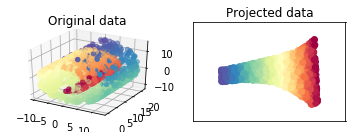

In [51]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn import manifold, datasets

X, color = datasets.samples_generator.make_swiss_roll(n_samples=1500)

print("Computing LLE embedding")
X_r, err = manifold.locally_linear_embedding(X, n_neighbors=12,
                                             n_components=2)
print("Done. Reconstruction error: %g" % err)


fig = plt.figure()

ax = fig.add_subplot(221, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.Spectral)

ax.set_title("Original data")
ax = fig.add_subplot(222)
ax.scatter(X_r[:, 0], X_r[:, 1], c=color, cmap=plt.cm.Spectral)
plt.axis('tight')
plt.xticks([]), plt.yticks([])
plt.title('Projected data')
plt.show()


(1500, 3)
(1500, 2)


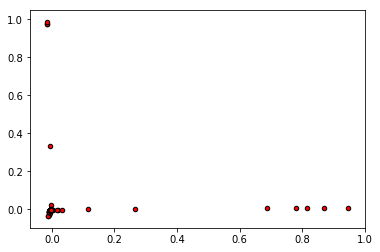

In [63]:
from sklearn.decomposition import KernelPCA
kpca = KernelPCA(kernel="rbf", fit_inverse_transform=True, gamma=10,n_components=2)
print(X.shape)
X_kpca = kpca.fit_transform(X)
print(X_kpca.shape)
plt.scatter(X_kpca[:, 0], X_kpca[:, 1], c="red",
           s=20, edgecolor='k')

(1500, 1500) (3,) (3, 3)


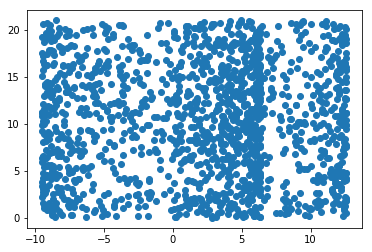

In [64]:
X_pca = pca(X, 2)
plt.scatter(X[:,0], X[:,1])